In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from sklearn import svm

## 1. Load the dataset

In [4]:
#Load Parkinson’s Disease data file
medical_data = pd.read_csv("Data - Parkinsons.csv")

## 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes, Proprietary content. ©Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited types of attributes and a general idea of likely challenges in the dataset

In [5]:
#Peek into the data
medical_data.head(10)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5  phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6  phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7  phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8  phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9  phon_R01_S02_4       95.056       120.103        91.226         0.00532   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   
5           0.00008   0.00463   0.00750     0.01388       0.04701  ...   
6           0.00003   0.00155   0.00202     0.00466       0.01608  ...   
7           0.00003   0.00144   0.00182     0.00431       0.01567  ...   
8           0.00006   0.00293   0.00332     0.00880       0.02093  ...   
9           0.00006   0.00268   0.00332     0.00803       0.02838  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
5      0.06985  0.01222  21.378       1  0.415564  0.825069 -4.242867   
6      0.02337  0.00607  24.886       1  0.596040  0.764112 -5.634322   
7      0.02487  0.00344  26.892       1  0.637420  0.763262 -6.167603   
8      0.03218  0.01070  21.812       1  0.615551  0.773587 -5.498678   
9      0.04324  0.01022  21.862       1  0.547037  0.798463 -5.011879   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  
5  0.299111  2.187560  0.357775  
6  0.257682  1.854785  0.211756  
7  0.183721  2.064693  0.163755  
8  0.327769  2.322511  0.231571  
9  0.325996  2.432792  0.271362  

[10 rows x 24 columns]

In [6]:
#Total number of rows and cols
medical_data.shape

(195, 24)

In [7]:
#number of points & numer of features
print('No. of features:', medical_data.shape[1])
print('No. of Datapoints:', medical_data.shape[0])

No. of features: 24
No. of Datapoints: 195


In [8]:
#Display all the features in dataset
medical_data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [9]:
#displays the data type
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

# Observation: 
1. 'name' is string type variable which can be dropped going forward
2. 'status' is the target variable where 1 - detected with parkinsons 0 - doesnt have PD
3. Other all attributes are numerical in nature 

In [10]:
#To check if any missing values are there in any variable
medical_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# Observation:
No null or missing values with in attributes 

In [11]:
#Five point summary for each variable
medical_data.describe().transpose()

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

# 3. Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationships between variables

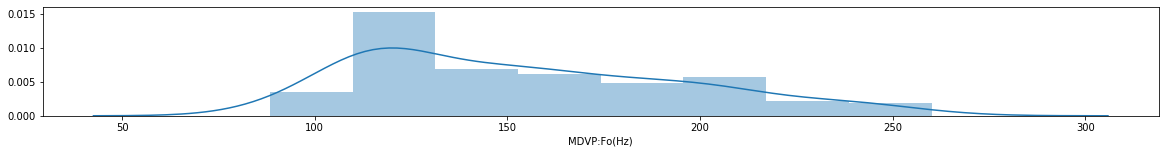

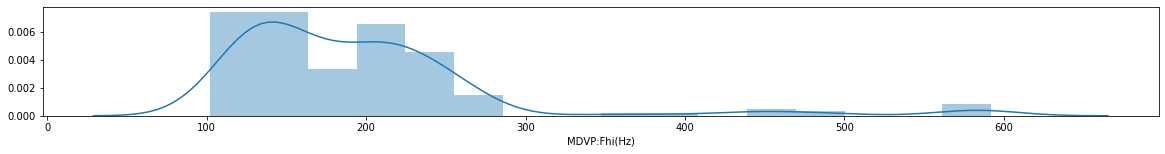

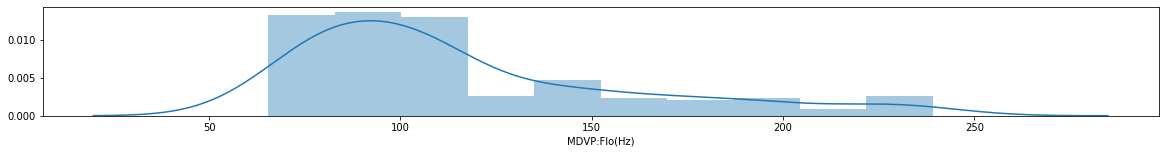

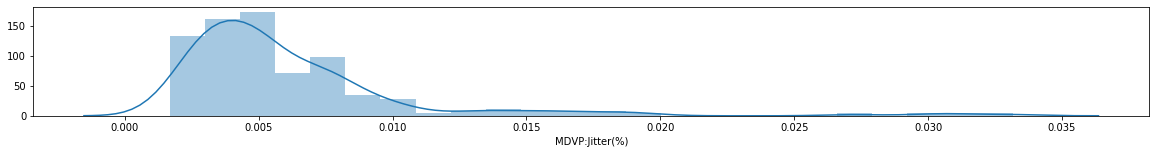

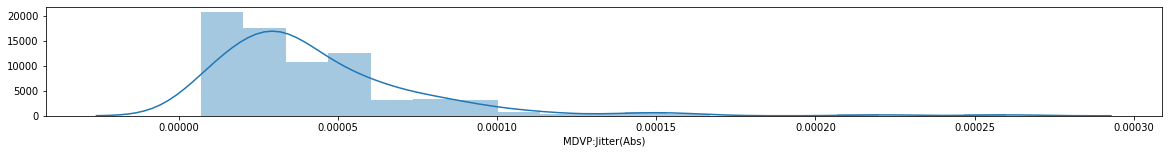

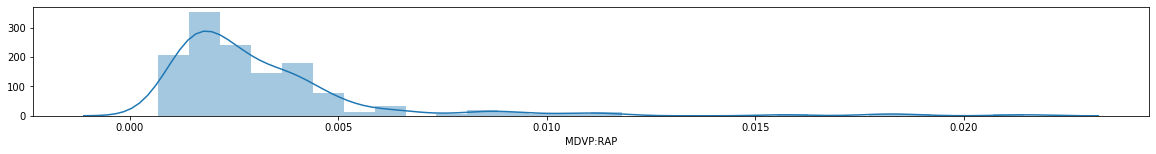

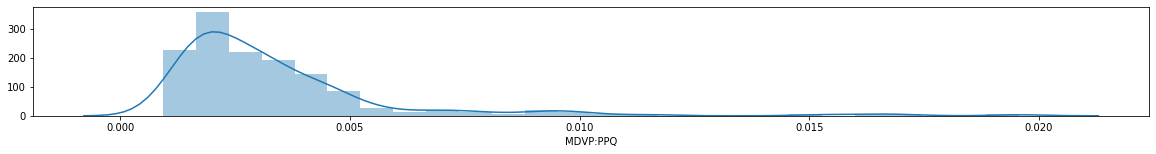

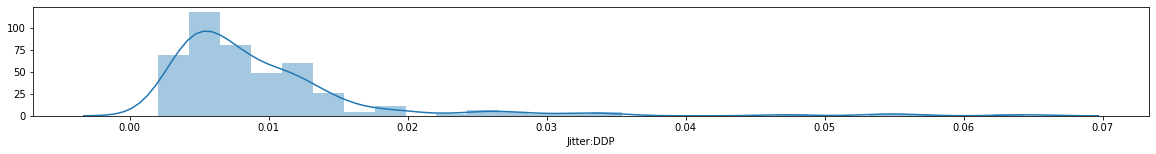

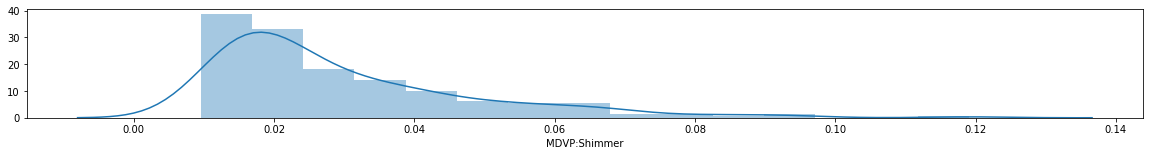

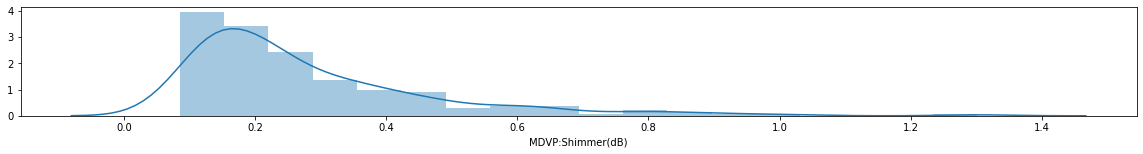

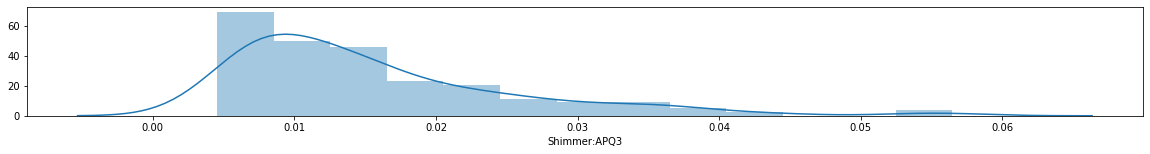

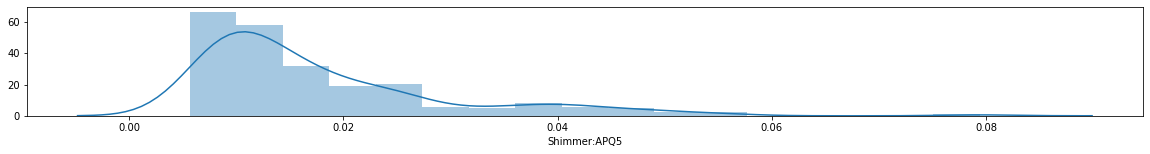

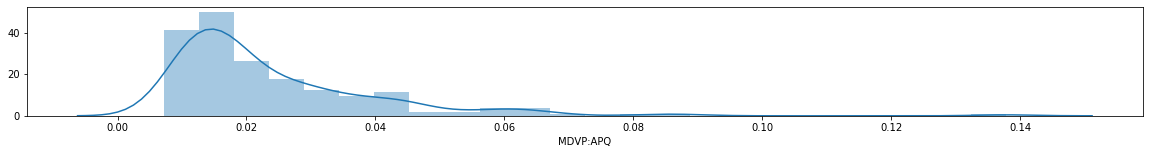

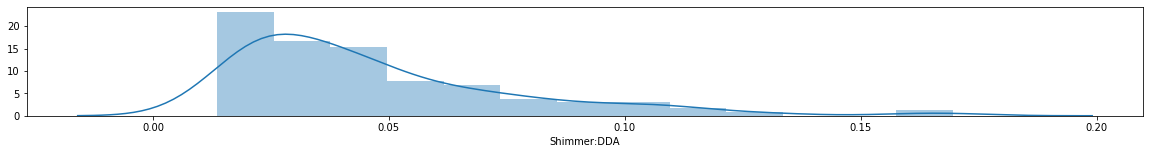

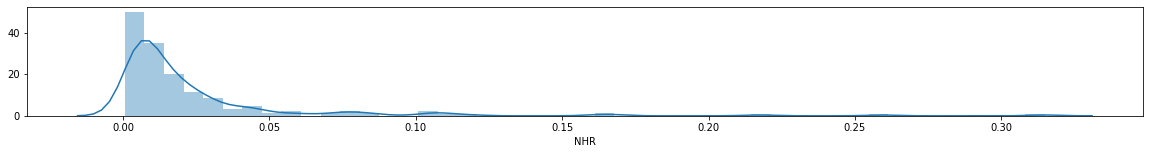

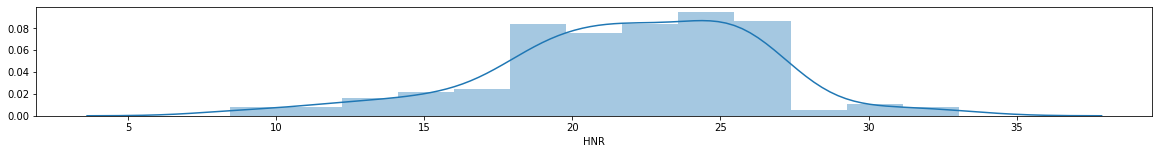

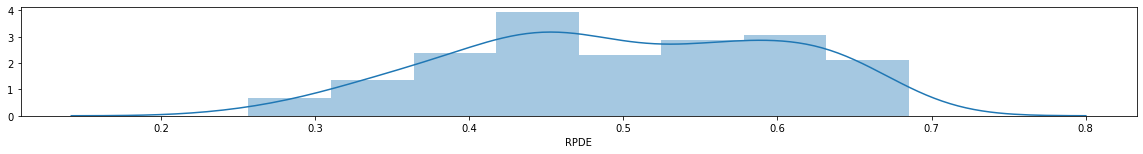

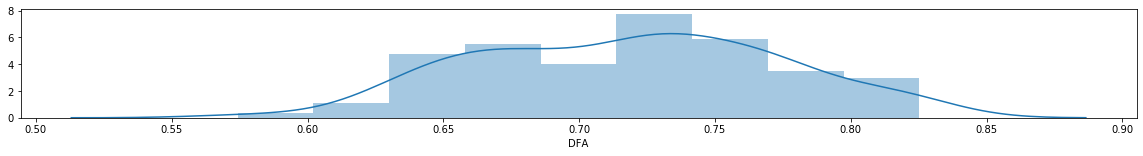

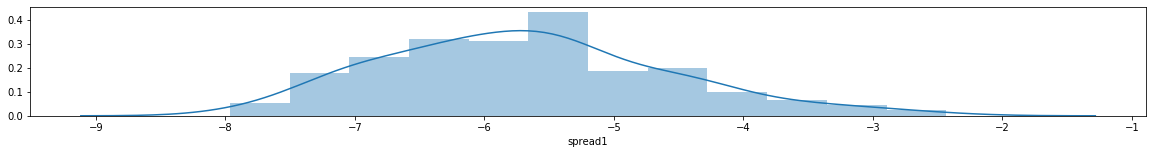

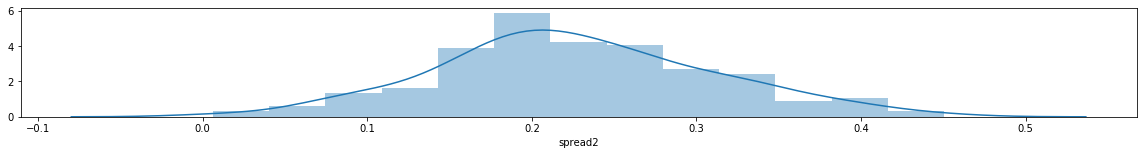

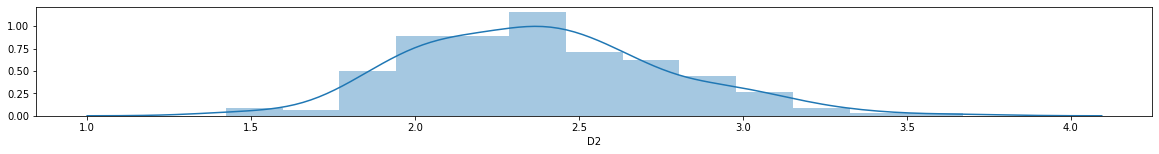

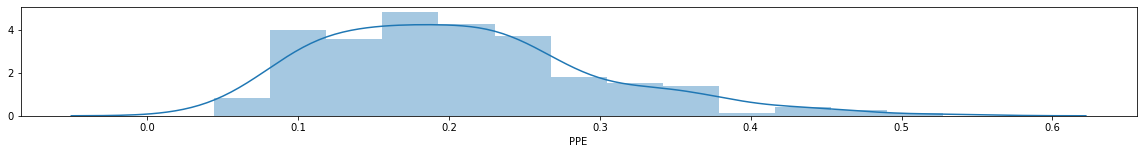

In [12]:
#plots to show the histogram and distribution 
col=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']
for ind in col:
  plt.figure(figsize=(20,2))
  sns.distplot(medical_data[ind])
  plt.show()

# Observation:
1. most of the attributes have skewness 
2. 'PPE', D2, spread1, spread2 follow normal distribution to some extent

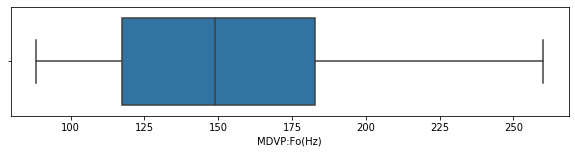

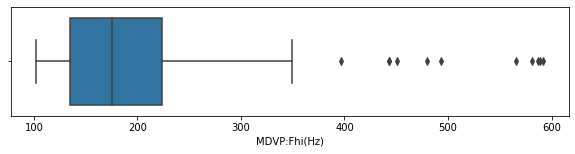

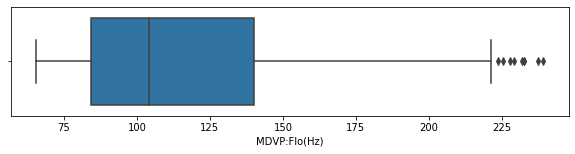

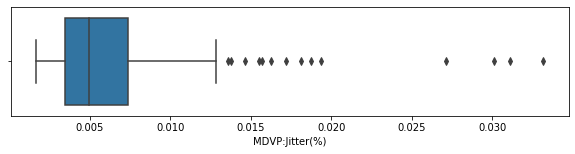

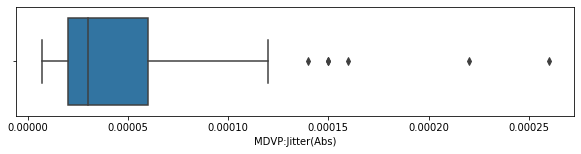

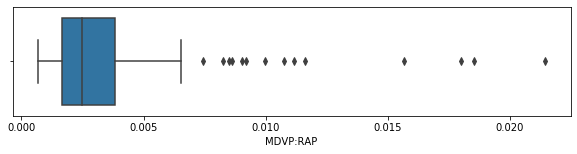

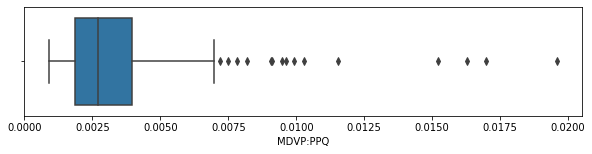

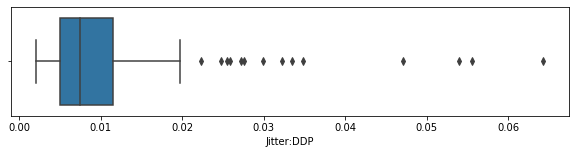

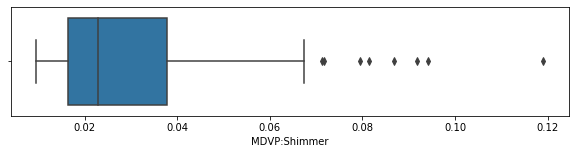

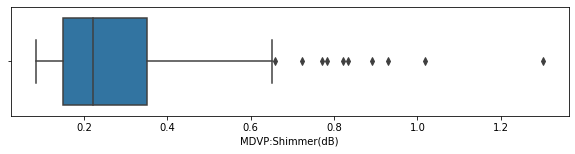

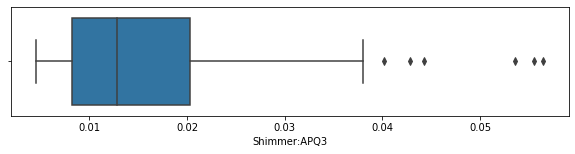

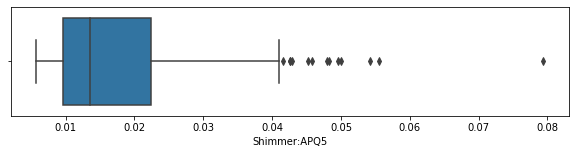

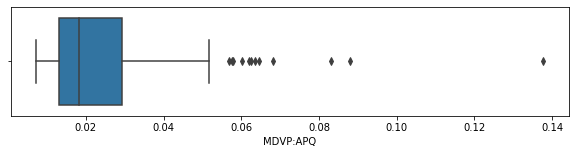

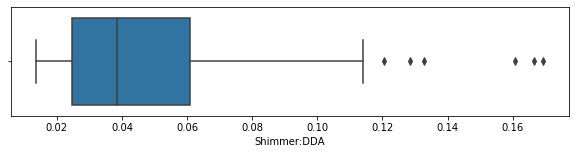

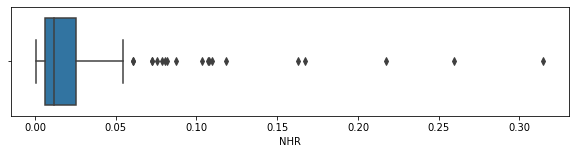

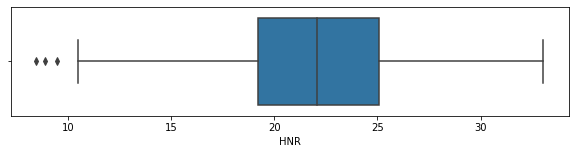

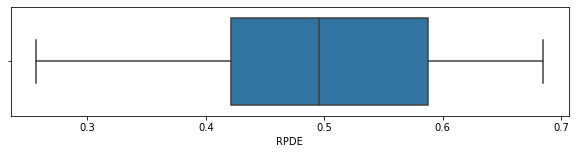

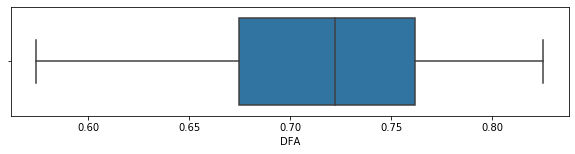

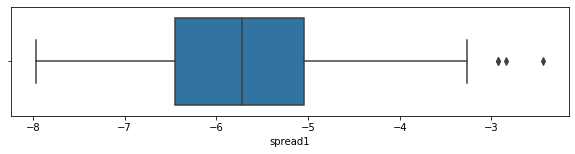

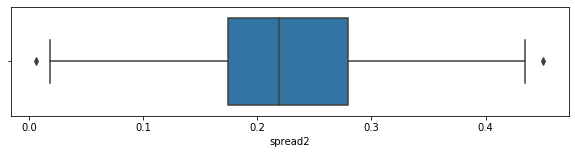

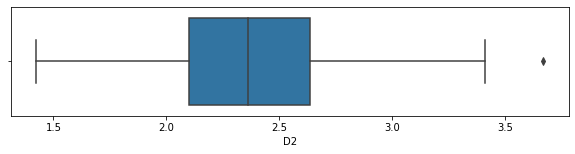

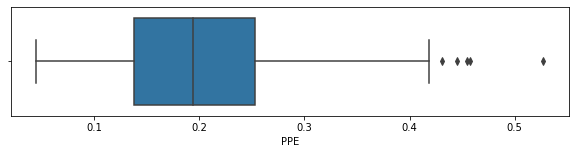

In [18]:
# EDA Checking the presence of outliers in case of continous variables
col=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']
for ind in col:
  plt.figure(figsize=(10,2))
  sns.boxplot(data = medical_data, x = ind)
  plt.show()

In [13]:
col=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']
for ind in col:
  Q1=np.percentile(medical_data[ind], 25)
  Q3=np.percentile(medical_data[ind], 75)
  IQR=Q3-Q1
  lower_whisker=Q1-IQR*1.5
  upper_whisker=Q3+IQR*1.5
  outlayers=medical_data[(medical_data[ind]>upper_whisker)|(medical_data[ind]<lower_whisker)][ind]
  print('NO of outlayers for {} is: {}'.format(ind, len(outlayers)))

NO of outlayers for MDVP:Fo(Hz) is: 0
NO of outlayers for MDVP:Fhi(Hz) is: 11
NO of outlayers for MDVP:Flo(Hz) is: 9
NO of outlayers for MDVP:Jitter(%) is: 14
NO of outlayers for MDVP:Jitter(Abs) is: 6
NO of outlayers for MDVP:RAP is: 14
NO of outlayers for MDVP:PPQ is: 15
NO of outlayers for Jitter:DDP is: 14
NO of outlayers for MDVP:Shimmer is: 8
NO of outlayers for MDVP:Shimmer(dB) is: 10
NO of outlayers for Shimmer:APQ3 is: 6
NO of outlayers for Shimmer:APQ5 is: 13
NO of outlayers for MDVP:APQ is: 12
NO of outlayers for Shimmer:DDA is: 6
NO of outlayers for NHR is: 19
NO of outlayers for HNR is: 3
NO of outlayers for RPDE is: 0
NO of outlayers for DFA is: 0
NO of outlayers for spread1 is: 4
NO of outlayers for spread2 is: 2
NO of outlayers for D2 is: 1
NO of outlayers for PPE is: 5


## Observation: Few of the attributes can be seen having outliers

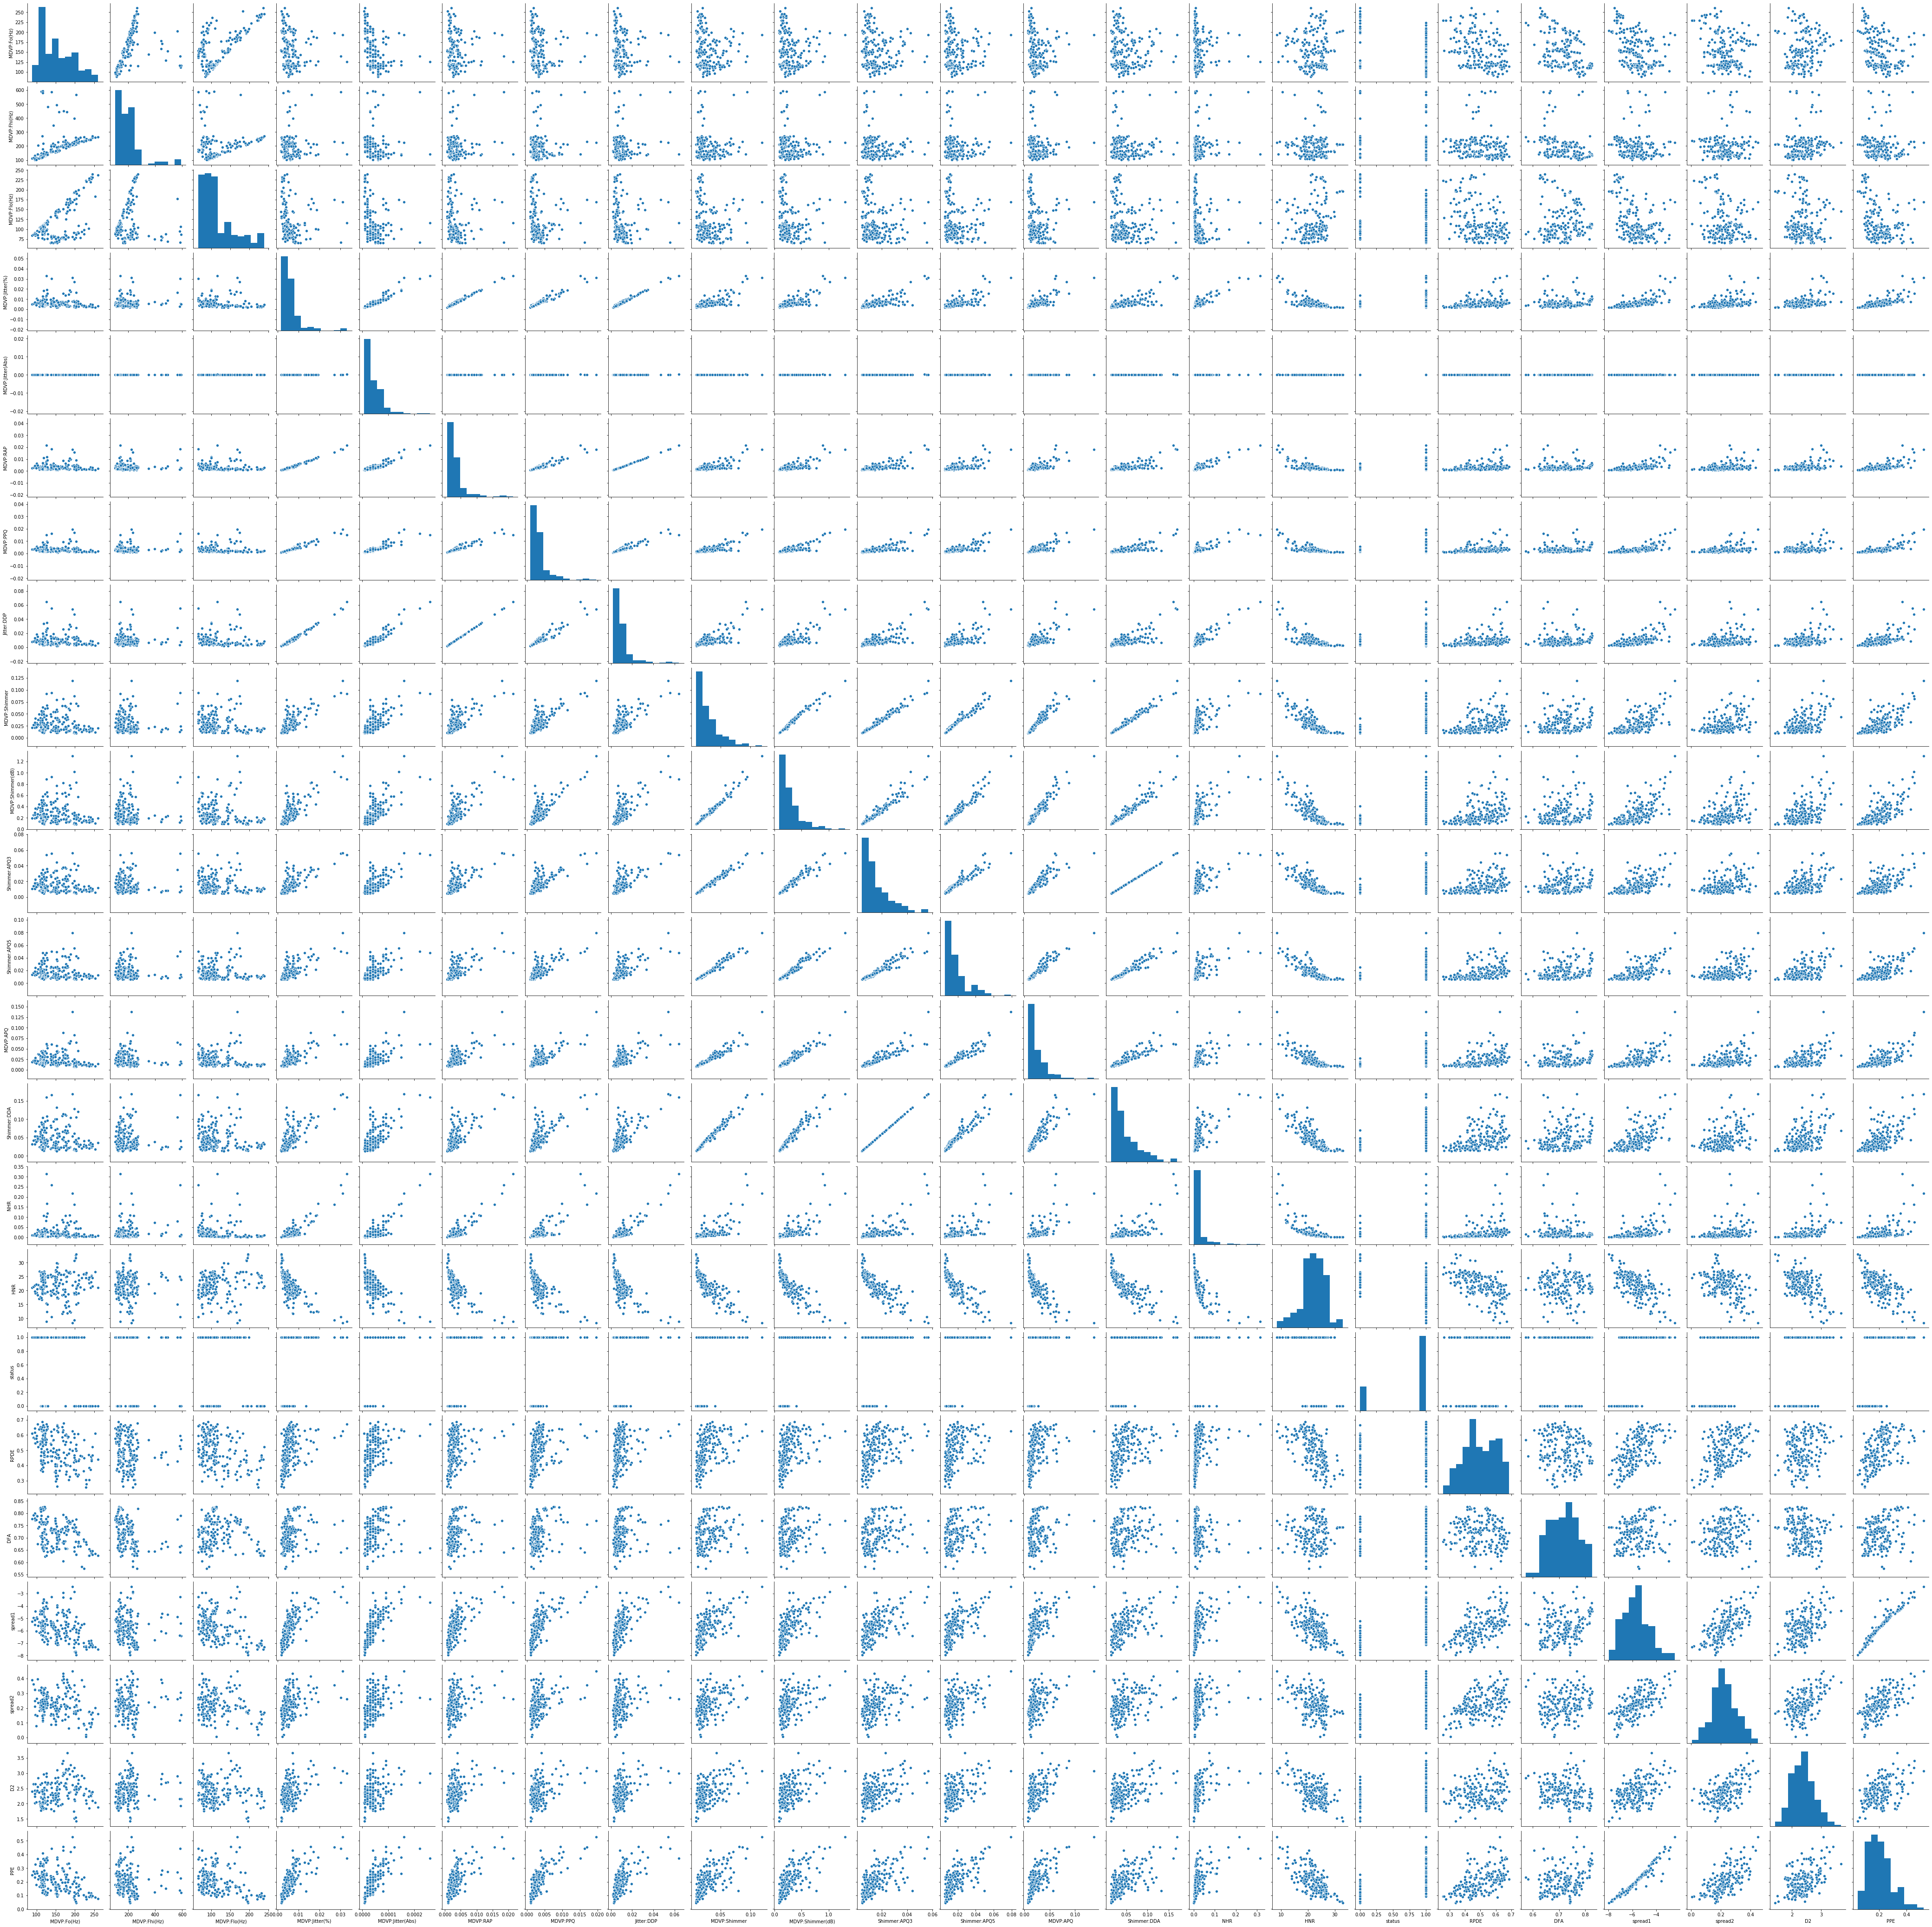

In [14]:
#to check the association with all the variables excluding ID
sns.pairplot(medical_data.iloc[:,1:])

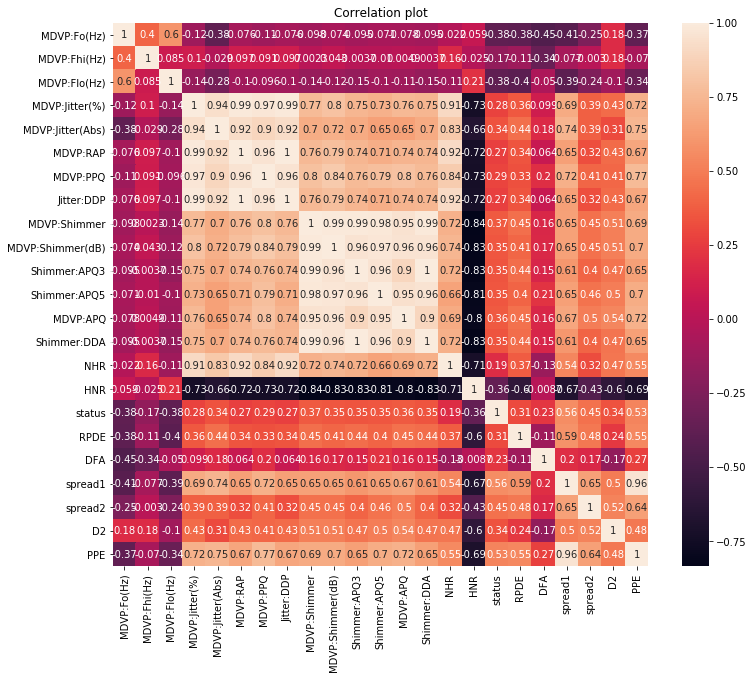

In [15]:
#Finding corelation between features
cor = medical_data.corr()
plt.figure(figsize=(12,10))
plt.title("Correlation plot")
sns.heatmap(cor,annot=True)
plt.show()

## Observation:
Can be noticed that most of the pairs of attributes have collinearity we can observe and drop few of the attributes which do not impact 

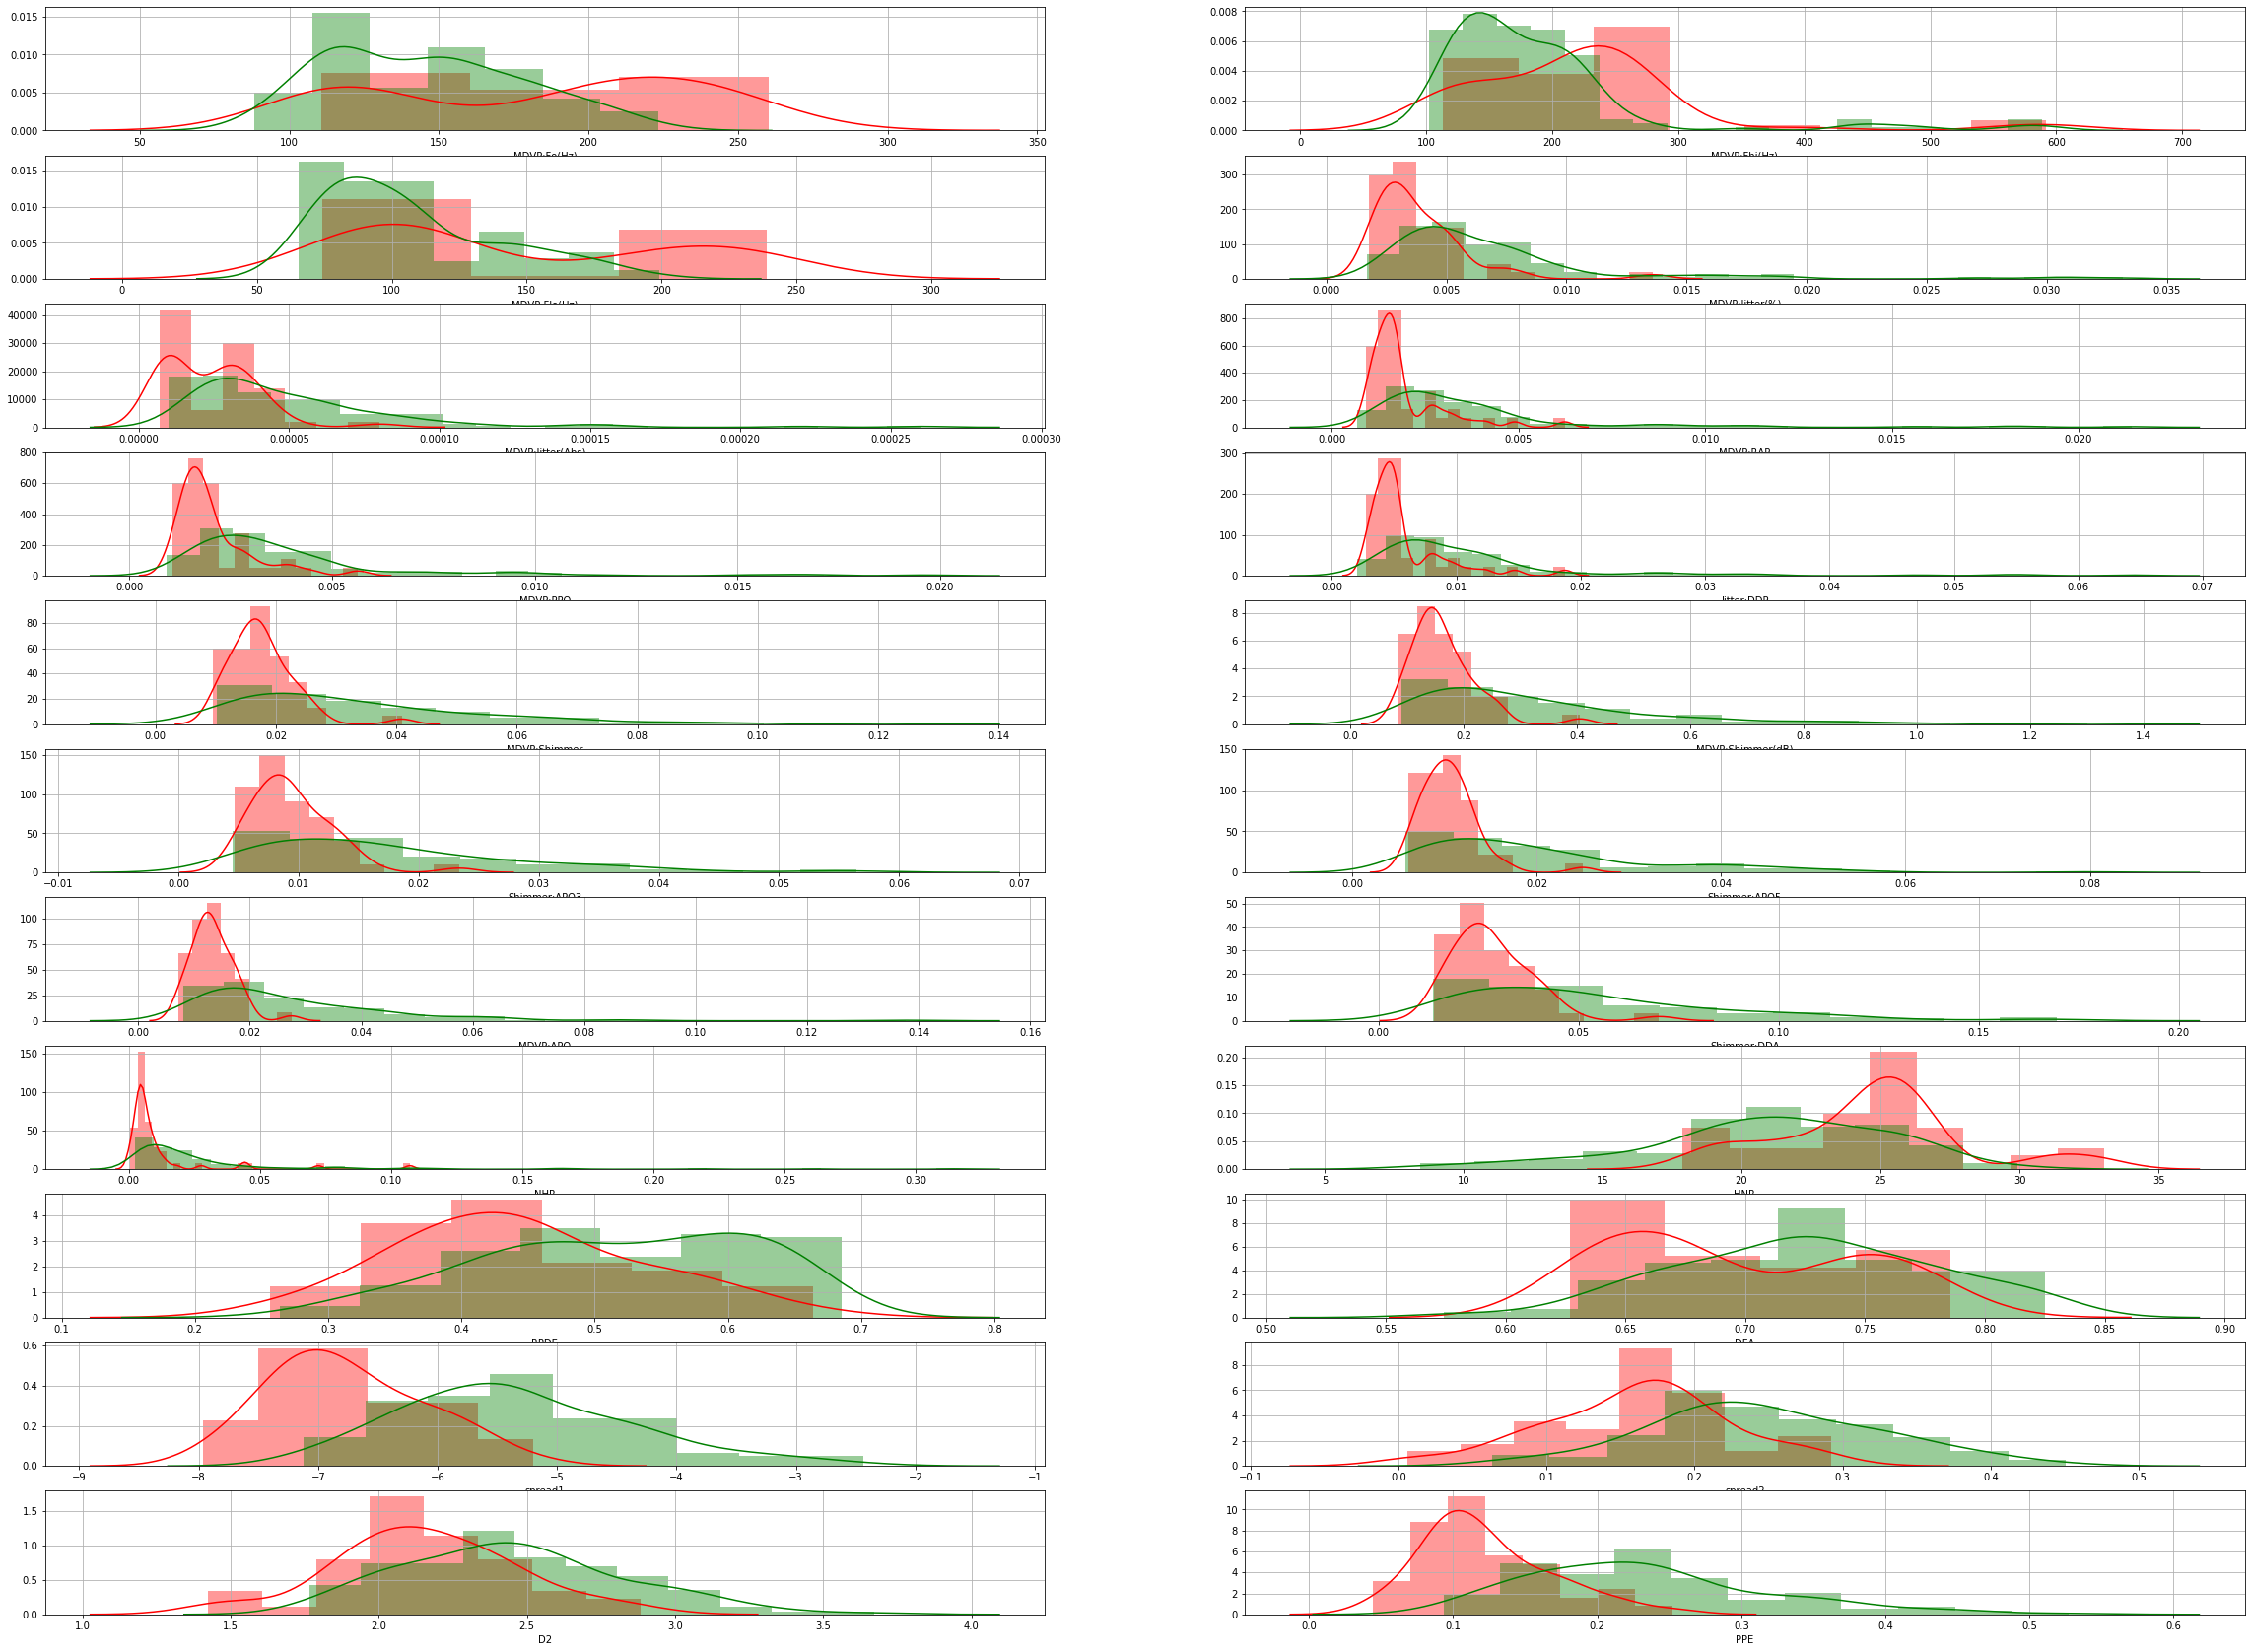

In [21]:
col=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']
plt.figure(figsize=(40,30))
k=1
for i in col:
    plt.subplot(11,2,k)
    sns.distplot( medical_data[medical_data['status'] == 0][i], color = 'r')
    sns.distplot( medical_data[medical_data['status'] == 1][i], color = 'g')
    k=k+1
    plt.grid(True)
plt.show()

## Observaton:
We can observe the relationships between various attributes for the patients detected and not detected. But there is overlap in every paired pattern 

# 4. Split the dataset into training and test set in the ratio of 70:30

# 5. Prepare the data for training - Scale the data if necessary, get rid of missing

In [24]:
# Dropping Age, Zip code and ID from the dataset
medical_data = medical_data.drop(['name'],axis=1)

In [27]:
medical_data.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [25]:
#shows the no of people disgonosed with PD
medical_data["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

In [28]:
#Class label is having imbalance data so we will re-balance the class variable using upsample method
#splitting major and minor class data frames

df_majority=medical_data[medical_data['status']==1]
df_minority=medical_data[medical_data['status']==0]

print("Majority class shape {}".format(df_majority.shape))
print("Minority class shape {}".format(df_minority.shape))

Majority class shape (147, 23)
Minority class shape (48, 23)


In [31]:
from sklearn.utils import resample
#Upsampling
df_minority_upsample=resample(df_minority,n_samples=147)
df_minority_upsample['status'].value_counts()

0    147
Name: status, dtype: int64

In [32]:
#Joining both dataframes
df=pd.concat([df_majority,df_minority_upsample])

In [33]:
df['status'].value_counts()

1    147
0    147
Name: status, dtype: int64

In [34]:
#Seperating x and y variables as training and testing data set
x = df.drop(['status'],axis=1)
y = df['status']

In [35]:
#Forming the training and testing set
#We will use 70% of data for training and 30% for testing.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [36]:
x_train.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
184      116.848       217.552        99.503         0.00531   
60       209.144       237.494       109.379         0.00282   
103      150.258       154.609        75.349         0.00248   
172      110.739       113.597       100.139         0.00356   
156      122.336       142.369        94.794         0.00727   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
184           0.00005   0.00260   0.00346     0.00780       0.01795   
60            0.00001   0.00147   0.00152     0.00442       0.01861   
103           0.00002   0.00105   0.00136     0.00315       0.01131   
172           0.00003   0.00170   0.00200     0.00510       0.01484   
156           0.00006   0.00415   0.00339     0.01246       0.02293   

     MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE  \
184             0.163  ...   0.01756      0.02429  0.01179  22.085  0.663842   
60              0.170  ...   0.01382      0.02925  0.00871  25.554  0.341788   
103             0.107  ...   0.01009      0.01567  0.00495  26.759  0.296888   
172             0.133  ...   0.01285      0.02261  0.00430  26.550  0.369090   
156             0.223  ...   0.01771      0.03615  0.03191  22.953  0.611679   

          DFA   spread1   spread2        D2       PPE  
184  0.656516 -5.198864  0.206768  2.120412  0.252404  
60   0.678874 -7.040508  0.066994  2.460791  0.101516  
103  0.722356 -6.878393  0.089267  2.004055  0.113942  
172  0.776158 -6.085567  0.192375  1.889002  0.174152  
156  0.623731 -5.435100  0.230532  2.699645  0.220546  

[5 rows x 22 columns]

In [39]:
y_train.value_counts()

1    106
0     99
Name: status, dtype: int64

In [40]:
print("{0:0.2f}% data is in training set-x".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set-x".format((len(x_test)/len(df.index)) * 100))
print("{0:0.2f}% data is in training set-y".format((len(y_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set-y".format((len(y_test)/len(df.index)) * 100))

69.73% data is in training set-x
30.27% data is in test set-x
69.73% data is in training set-y
30.27% data is in test set-y


# 6. Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data

## Training data using Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
PD_naive_model = GaussianNB()

PD_naive_model.fit(x_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
PD_train_predict_naive = PD_naive_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, PD_train_predict_naive)))

Model Accuracy: 0.7978


## Observation:
1. Accuracy using Naive bayes - 0.7978

Confusion Matrix


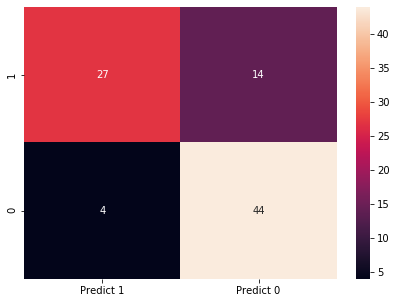

In [47]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, PD_train_predict_naive, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

Observation: The confusion matrix

True Positives (TP): we correctly predicted that these patients are detected with parkinsons disease - 27

True Negatives (TN): we correctly predicted that these patients are not detected with parkinsons disease - 44

False Positives (FP): we incorrectly predicted that patients are detected with parkinsons disease ("Type I error") - 14

False Negatives (FN): we incorrectly predicted that patients are not detected with parkinsons disease ("Type II error") - 4

Accuracy with Naive bayes - 0.7978

In [48]:
print("Classification Report")
print(metrics.classification_report(y_test, PD_train_predict_naive, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.87      0.66      0.75        41
           0       0.76      0.92      0.83        48

    accuracy                           0.80        89
   macro avg       0.81      0.79      0.79        89
weighted avg       0.81      0.80      0.79        89



## Scaling data

In [66]:
#scaling the data set 

from sklearn.preprocessing import scale
x_train_scaled = scale(x_train)
x_test_scaled = scale(x_test) 


## Training data using logistic regression

In [111]:
#Traning the data using Logistic regression Algorithm
from sklearn.linear_model import LogisticRegression

# Fit the model on train
PD_logistic_model = LogisticRegression(solver="liblinear",  C = 1, penalty = 'l2')
PD_logistic_model.fit(x_train_scaled, y_train)

#predict on test
y_predict = PD_logistic_model.predict(x_test_scaled)

model_score = PD_logistic_model.score(x_test_scaled, y_test)
print('Accuracy -', model_score)

Accuracy - 0.797752808988764


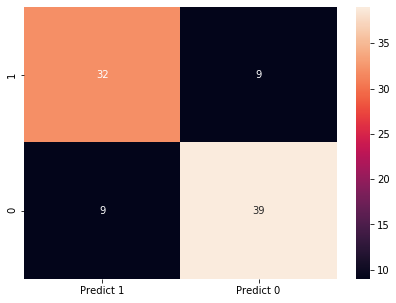

In [68]:
#confusion matrix for Logistic regression model
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

Observation: The confusion matrix

True Positives (TP): we correctly predicted that these patients are detected with parkinsons disease - 32

True Negatives (TN): we correctly predicted that these patients are not detected with parkinsons disease - 39

False Positives (FP): we incorrectly predicted that patients are detected with parkinsons disease ("Type I error") - 9

False Negatives (FN): we incorrectly predicted that patients are not detected with parkinsons disease ("Type II error") - 9

Accuracy with Logistic regression - 0.797752

## Training data using KNN model

In [70]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(x_train_scaled, y_train)
    scores.append(NNH.score(x_test_scaled, y_test))

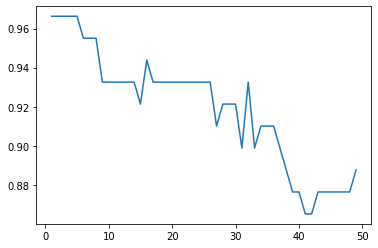

In [71]:
plt.plot(range(1,50),scores)

In [74]:
# instantiate learning model k = optimal_k
# To avoid overfitting, taking optimal_k = 3
optimal_k = 3
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(x_train_scaled, y_train)
print(accuracy_score(y_train,knn_optimal.predict(x_train_scaled)))

# predict the response
pred = knn_optimal.predict(x_test_scaled)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

0.9853658536585366

The accuracy of the knn classifier for k = 3 is 96.629213%


Confusion Matrix


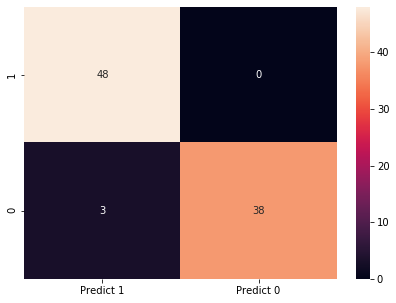

In [75]:
# calculate accuracy measures and confusion matrix

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, pred)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

Observation: The confusion matrix

True Positives (TP): we correctly predicted that these patients are detected with parkinsons disease - 48

True Negatives (TN): we correctly predicted that these patients are not detected with parkinsons disease - 38

False Positives (FP): we incorrectly predicted that patients are detected with parkinsons disease ("Type I error") - 0

False Negatives (FN): we incorrectly predicted that patients are not detected with parkinsons disease ("Type II error") - 3

Accuracy with KNN - 0.985365

In [76]:
print("Classification Report")
print(metrics.classification_report(y_test, pred, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        41
           0       0.94      1.00      0.97        48

    accuracy                           0.97        89
   macro avg       0.97      0.96      0.97        89
weighted avg       0.97      0.97      0.97        89



## Training model using SVM

In [122]:
clf = svm.SVC(gamma=0.025, C=3)   

In [123]:
clf.fit(x_train_scaled , y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [124]:
y_pred = clf.predict(x_test_scaled)

In [127]:
# print accuracy 
acc = accuracy_score(y_test, y_pred) * 100
print(acc)

92.13483146067416


Confusion Matrix


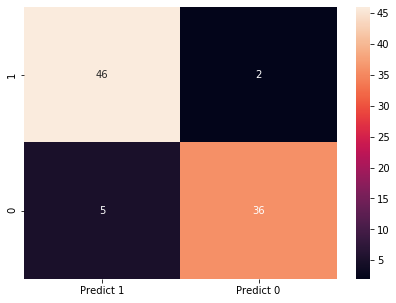

In [128]:
# calculate accuracy measures and confusion matrix

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## 7.  Train a meta-classifier and note the accuracy on test data

## Build Decision Tree Model

In [89]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

## Scoring our Decision Tree

In [90]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

1.0
0.9662921348314607


# Observation:
Building model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. But as we can see that using default depth Ovefits the model where the trained has perfect accuracy but in case of test data it fails to achieve the accuarcy. So we need to limit the depth or the nodes in the decision tree.

## Visualizing Decision tree

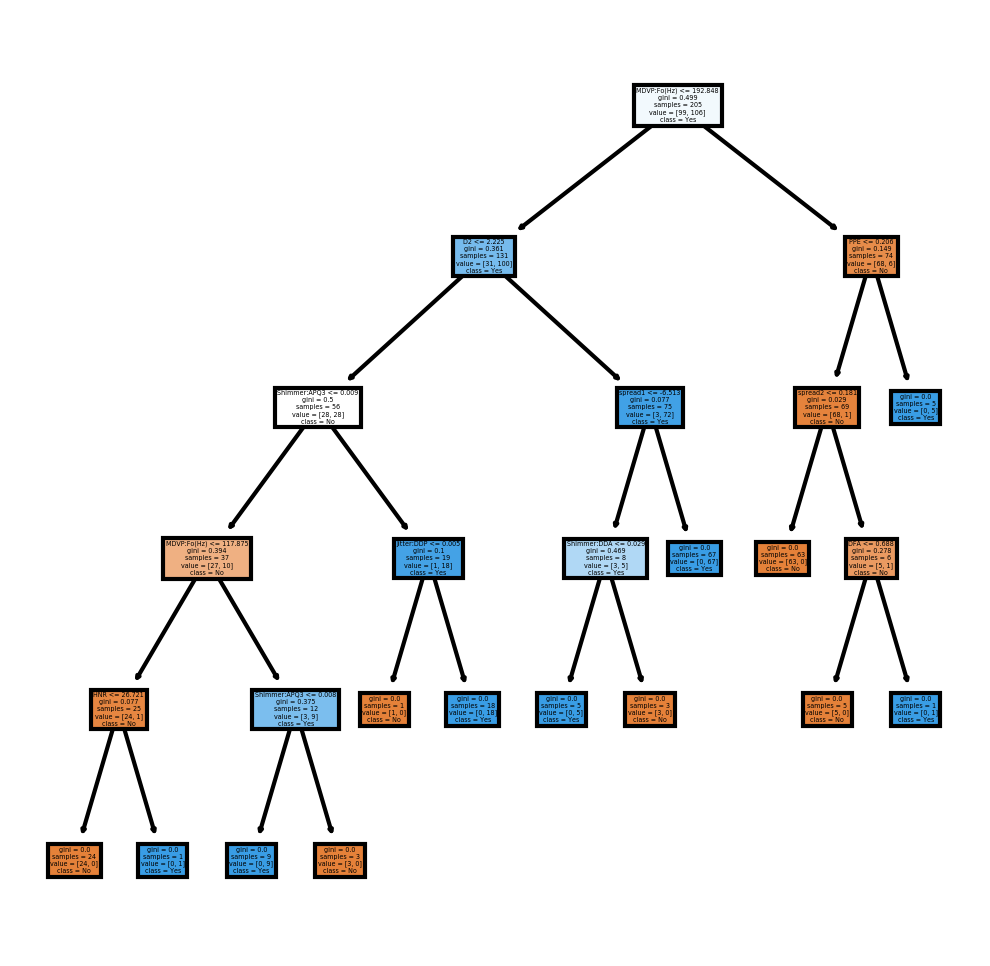

In [91]:
# visualize using plot_tree method from sklearn.tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(x_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

## Reducing over fitting (Regularization)

In [94]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.926829268292683
0.8651685393258427


# Observation:
We can notice here that Overfitting has been significantly reduced by limiting the depth

Accuracy using Decision tree model- 0.865

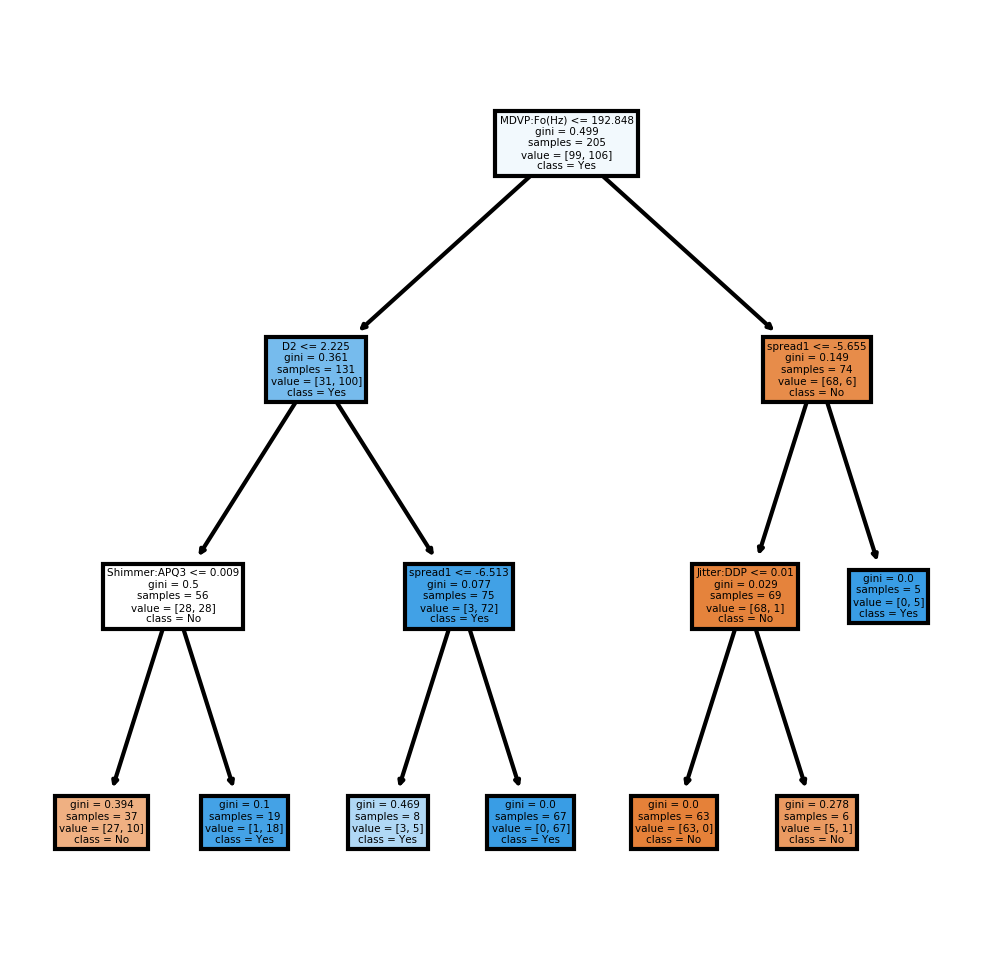

In [96]:
# we can use plot_tree method from sklearn.tree

fn = list(x_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTreeR, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

# Observation:
With 3 levels we have achieved a better accuracy which can be seen above.

In [97]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = x_train.columns))

                       Imp
MDVP:Fo(Hz)       0.547070
MDVP:Fhi(Hz)      0.000000
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.003782
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ3      0.143035
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.000000
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.000000
spread1           0.137510
spread2           0.000000
D2                0.168603
PPE               0.000000


## Convolution matrix for Decision tree

0.8651685393258427


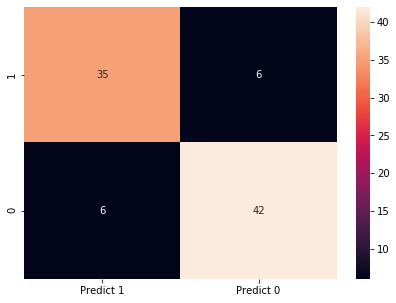

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(dTreeR.score(x_test , y_test))
y_predict = dTreeR.predict(x_test)

cm = confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Observation:
The confusion matrix

True Positives (TP): we correctly predicted that these patients are detected with parkinsons disease - 35

True Negatives (TN): we correctly predicted that these patients are not detected with parkinsons disease - 42

False Positives (FP): we incorrectly predicted that patients are detected with parkinsons disease ("Type I error") - 6

False Negatives (FN): we incorrectly predicted that patients are not detected with parkinsons disease ("Type II error") - 6

Accuracy of decision tree - 0.86516

In [99]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.85      0.85      0.85        41
           0       0.88      0.88      0.88        48

    accuracy                           0.87        89
   macro avg       0.86      0.86      0.86        89
weighted avg       0.87      0.87      0.87        89



## 8. Train at least one standard Ensemble model

# Train model using Bagging

In [112]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)


0.9775280898876404


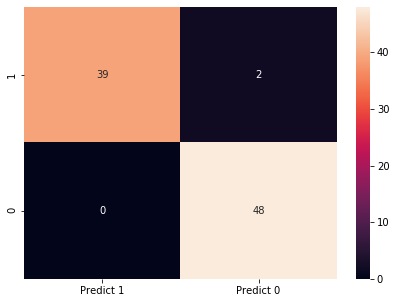

In [113]:
y_predict = bgcl.predict(x_test)

print(bgcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Observation: The confusion matrix

True Positives (TP): we correctly predicted that these patients are detected with parkinsons disease - 39

True Negatives (TN): we correctly predicted that these patients are not detected with parkinsons disease - 48

False Positives (FP): we incorrectly predicted that patients are detected with parkinsons disease ("Type I error") - 2

False Negatives (FN): we incorrectly predicted that patients are not detected with parkinsons disease ("Type II error") - 0

Accuracy with Bagging - 0.977

In [114]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.95      0.97        41
           0       0.96      1.00      0.98        48

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



# Train model using AdaBoosting

In [106]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(x_train, y_train)

0.8539325842696629


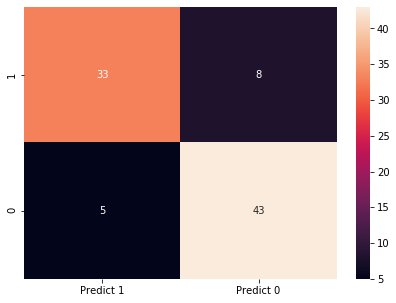

In [107]:
y_predict = abcl.predict(x_test)
print(abcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Observation: The confusion matrix

True Positives (TP): we correctly predicted that these patients are detected with parkinsons disease - 33

True Negatives (TN): we correctly predicted that these patients are not detected with parkinsons disease - 43

False Positives (FP): we incorrectly predicted that patients are detected with parkinsons disease ("Type I error") - 8

False Negatives (FN): we incorrectly predicted that patients are not detected with parkinsons disease ("Type II error") - 5

Accuracy with AdaBoosting - 0.853

## Training model using gradient boosting 

In [120]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)


0.9887640449438202


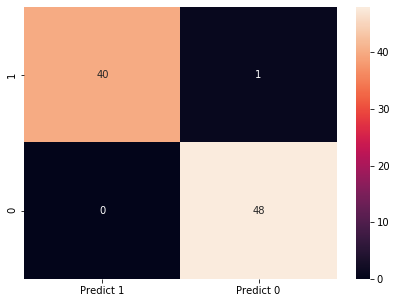

In [121]:
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Observation: The confusion matrix

True Positives (TP): we correctly predicted that these patients are detected with parkinsons disease - 40

True Negatives (TN): we correctly predicted that these patients are not detected with parkinsons disease - 48

False Positives (FP): we incorrectly predicted that patients are detected with parkinsons disease ("Type I error") - 1

False Negatives (FN): we incorrectly predicted that patients are not detected with parkinsons disease ("Type II error") - 0

Accuracy with Random forest - 0.9887

## Train model using Random Forest classifier

In [115]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(x_train, y_train)

0.9887640449438202


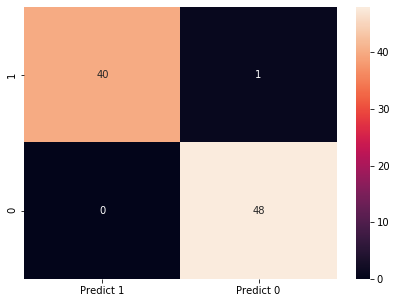

In [116]:
y_predict = rfcl.predict(x_test)
print(rfcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Observation: The confusion matrix

True Positives (TP): we correctly predicted that these patients are detected with parkinsons disease - 40

True Negatives (TN): we correctly predicted that these patients are not detected with parkinsons disease - 48

False Positives (FP): we incorrectly predicted that patients are detected with parkinsons disease ("Type I error") - 1

False Negatives (FN): we incorrectly predicted that patients are not detected with parkinsons disease ("Type II error") - 0

Accuracy with Random forest - 0.9887

In [117]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        41
           0       0.98      1.00      0.99        48

    accuracy                           0.99        89
   macro avg       0.99      0.99      0.99        89
weighted avg       0.99      0.99      0.99        89



## 9. Compare all the models (minimum 5) and pick the best one among them

Amongst all the model Random forest and Gradient boosting can be taken as the best pick for detecting a person for parkinsons disease it has a accuracy of 0.9887
Accuracy with Bagging - 0.977 has also performed well
Ada Boosting has a accuracy of 0.853
Decision tree has given accuracy of 0.865
KNN model Accuracy - Accuracy with KNN - 0.985365 performed equally well in perdicting the disease

We can notice the various model and the accuracy and percision, confusion matrix gives the idea of number of type errors after exeuting the model